# Исследование недвижимости Санкт-Петербурга

План исследования:
- Начало
    - Подготовка данных
    - Расчет и добавление нужных данных в таблицу
    - Выводы
- Исследовательский анализ данных
    - Факторы влияющие на стоимость квартиры
    - Цены в пригороде
    - Корреляция факторов с ценами

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Начало исследования

Исследование проводится на основании данных сервиса Яндекс.Недвижимость - архив объявления о продаже квартир в Санкт-Петербурге за несколько лет.

In [2]:
df = pd.read_csv('real_estate_data.csv', sep = '\t')
pd.options.display.max_columns = 999
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица содержит 23699 записей, 22 столбца с различными типами данных:

- total_images - кол-во фотографий
- last_price - цена квартиры
- total_area - общая площадь
- first_day_exposition - дата размещения
- rooms - кол-во комнат
- ceiling_height - высота потолка
- floors_total - этажность дома
- living_area - жилая площадь
- floor - этаж
- is_apartment - апартаменты
- studio - студия
- open_plan - открытая планировка
- kitchen_area - площадь кухни
- balcony - кол-во балконов
- locality_name - название города расположения
- airports_nearest - расстояние до ближайшего аэропорта
- cityCenters_nearest - расстояние до центра города
- parks_around3000 - кол-во парков в радиусе 3-х км
- parks_nearest - расстояние до ближайшего парка
- ponds_around3000 - кол-во водоемов в радиусе 3-х км
- ponds_nearest - расстояние до ближайшего водоема
- days_exposition - сколько времени было размещено объявление

В 14-ти столбцах содержатся пропущенные значения. Пропуски вызваны скорее всего неполным заполненим пользователями полей формы объявления.

In [4]:
#поиск дубликатов
df.duplicated().sum()

0

In [5]:
#перевод значений столбца 'first_day_exposition' в тип данных дата
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [6]:
df['is_apartment'] = df['is_apartment'].fillna(value = False)

Отсуствие данных в столбце "аппартаменты" на мой взгляд случайно, может быть вызвано не пониманием пользователем значения данного поля, в связи с тем, что данный тип жилой недвижимости в настоящий момент не получил широкого распространения.

В связи с этим, логично заполнить пропуски значением False. 

По большому счету столбец для дальнейшего анализа нам не нужен.

In [7]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

В основном, в выборке представлены 1-4 комнатные квартиры.

In [8]:
liv_total_rooms = df.pivot_table(index = 'rooms', values = ['living_area', 'total_area'])
liv_total_rooms['rel'] = liv_total_rooms['living_area'] / liv_total_rooms['total_area']
liv_total_rooms

,living_area,total_area,rel
rooms,,,
0,18.865246,29.279746,0.644310
1,17.893552,37.644669,0.475328
2,31.736849,55.855089,0.568200
3,47.387941,77.764580,0.609377
4,66.983223,107.610763,0.622458
5,100.009247,161.474816,0.619349
6,130.983636,201.537619,0.649922
7,163.564151,265.325424,0.616466
8,168.683333,259.233333,0.650701


В таблице представлены данные по жилой площади, общей площади и их отношению в зависимости от кол-ва комнат в квартире.

In [9]:
df.loc[(df['living_area'].isnull()) & (df['rooms'] <= 1) ,'living_area'] = df['total_area'] * 0.47
df.loc[(df['living_area'].isnull()) & (df['rooms'] == 2) ,'living_area'] = df['total_area'] * 0.56
df.loc[(df['living_area'].isnull()) & (df['rooms'] >= 3) ,'living_area'] = df['total_area'] * 0.60

Вычислил соотношение по средним величинам для жилой и общей площади для квартир с разным кол-вом комнат и заменил пропущенные значения в столбце с общей площадью на соответствующие значения.

In [10]:
kit_liv_tot = df.pivot_table(index = 'rooms', values = ['total_area', 'kitchen_area'])
kit_liv_tot['rel_kit_tot'] = kit_liv_tot['kitchen_area'] / kit_liv_tot['total_area']
kit_liv_tot

,kitchen_area,total_area,rel_kit_tot
rooms,,,
0,NaN,29.279746,NaN
1,9.550118,37.644669,0.253691
2,9.979584,55.855089,0.178669
3,11.308580,77.764580,0.145421
4,13.664033,107.610763,0.126976
5,18.367649,161.474816,0.113749
6,21.048763,201.537619,0.104441
7,21.998077,265.325424,0.082910
8,24.866667,259.233333,0.095924


Таблица показывает отношение площади кухни к общей площади в зависимости от количества комнат.

In [11]:
df.loc[(df['kitchen_area'].isnull()) & (df['rooms'] < 1) ,'kitchen_area'] = df['total_area']
df.loc[(df['kitchen_area'].isnull()) & (df['rooms'] == 1) ,'kitchen_area'] = df['total_area'] * 0.25
df.loc[(df['kitchen_area'].isnull()) & (df['rooms'] == 2) ,'kitchen_area'] = df['total_area'] * 0.17
df.loc[(df['kitchen_area'].isnull()) & (df['rooms'] >= 3) ,'kitchen_area'] = df['total_area'] * 0.14

Также поступил с заполнением пропусков площадей кухонь, в соотвествии со средним соотношением площади кухни площади по аналогичным квартирам с различным кол-вом комнат.

In [12]:
df[df['floors_total'].isnull()].sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9415,0,18400000.0,101.8,2015-03-28,3,NaN,NaN,53.2,8,False,False,False,18.9,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,863.0


In [13]:
df['floors_total'].mean()

10.67382374115953

In [14]:
df['floors_total'].median()

9.0

In [15]:
floors_total_mean = df['floors_total'].mean()
floors_total_median = df['floors_total'].median()

Среднее значение и медиана по столбцу 'floors_total' практически совпадают. Заменим пустые значения на медиану и поменяем тип данных на целочисленный.

In [16]:
df['floors_total'] = df['floors_total'].fillna(value = floors_total_median).astype('int')

In [115]:
#заполнение значений этажей, превышающих этажность дома и проверка 
df.loc[df['floor'] > df['floors_total'], 'floor'] = df['floors_total']
df.loc[df['floor'] > df['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total


In [18]:
df['floor'] = df['floor'].astype('int')

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,95.4,9,False,False,False,22.26,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [20]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['month_exposition'] = df['first_day_exposition'].dt.month
df['day_exposition'] = df['first_day_exposition'].dt.weekday

Добавил столбцы с годом, месяцем и днем публикации объявления.

In [21]:
def floor_cat(row):
    if row['floor'] == 1:
        return 1
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [22]:
df['floor_cat'] = df.apply(floor_cat, axis = 1)

In [23]:
df.query('floor_cat == "последний"').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat
7321,19,4160000.0,61.0,2017-01-16,2,2.65,9,35.5,9,False,False,False,11.30,1.0,посёлок Шушары,19739.0,30142.0,0.0,NaN,0.0,NaN,408.0,2017,1,0,последний
147,10,27700000.0,179.6,2017-07-06,5,2.85,25,97.2,25,False,False,False,33.80,2.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0,2017,7,3,последний
18319,6,950000.0,33.8,2016-06-22,2,NaN,2,26.0,2,False,False,False,5.20,0.0,поселок городского типа Вырица,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2016,6,2,последний
21020,10,1700000.0,56.9,2018-12-12,3,3.00,2,42.8,2,False,False,False,4.60,4.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,2,последний
13742,16,11000000.0,103.0,2015-04-28,3,NaN,7,67.0,7,False,False,False,14.42,0.0,Санкт-Петербург,24000.0,5141.0,1.0,639.0,1.0,662.0,473.0,2015,4,1,последний
11881,11,3800000.0,38.1,2018-10-19,1,NaN,16,15.8,16,False,False,False,11.20,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2018,10,4,последний
6918,15,2450000.0,36.4,2019-03-12,1,2.60,5,18.3,5,False,False,False,7.00,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3,1,последний
4954,16,5300000.0,58.0,2018-01-12,2,NaN,23,26.0,23,False,False,False,15.00,NaN,Санкт-Петербург,22308.0,24049.0,0.0,NaN,2.0,423.0,131.0,2018,1,4,последний
2798,5,3000000.0,31.4,2017-11-28,1,2.50,5,17.8,5,False,False,False,5.20,NaN,Сестрорецк,58086.0,35014.0,1.0,378.0,2.0,199.0,45.0,2017,11,1,последний
13004,8,3350000.0,29.4,2019-04-11,1,2.50,5,15.1,5,False,False,False,7.00,1.0,Санкт-Петербург,44154.0,14030.0,0.0,NaN,0.0,NaN,NaN,2019,4,3,последний


Добавил столбец 'floor_cat' с категорией этажности. Определяем категорию с помощью функции floor_cat. Проверили на случайной выборке с фильтром 'последний', все вроде работает правильно.

In [24]:
df['price_square_meter'] = df['last_price'] / df['total_area']

In [25]:
df['rel_living_total_area'] = (df['living_area'] / df['total_area'])

In [26]:
df['rel_kitchen_total'] = (df['kitchen_area']) / df['total_area']

Добавил столбцы со стоимостью квадратного метра 'price_square_meter', отношением жилой площади к общей 'rel_living_total_area', отношением площади кухни к общей площади 'rel_kitchen_total'.

In [27]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,3,3,другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214


In [28]:
df['floor_cat'] = df['floor_cat'].astype('category')

Поменяем тип данных в столбце 'floor_cat' на категории для оптимизации.

In [29]:
df['balcony'].value_counts(normalize = True)
df[df['balcony'].isnull()].sample(5)
df['balcony'].count()
df['balcony'] = df['balcony'].fillna(value = 0).astype('int')

Заполним пропуски в столбце 'balcony' на значение 0 и поменяем тип данных на целочисленный. Закономерностей пропусков не выявлено, предположу что пропуски ставили те пользователи, у которых нет балконов.

In [30]:
df['days_exposition'].mean()

180.88863436982163

In [31]:
df['days_exposition'].median()

95.0

In [32]:
days_exp_median = df['days_exposition'].median()

df['days_exposition'] = df['days_exposition'].fillna(value = days_exp_median)

Заменил пропуски в столбце 'days_exposition' на медиану.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  float64       
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         14504 non-null  float64       
 6   floors_total           23699 non-null  int32         
 7   living_area            23699 non-null  float64       
 8   floor                  23699 non-null  int32         
 9   is_apartment           23699 non-null  bool          
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           23699 non-null  float64       
 13  b

## 1. Выводы
Таблица с данными содержит 23699 записей, 22 столбца. Ряд столбцов содержит пропущенные значения. Дубликатов не выявлено.

В ряде столбцов выявлены пропуски. Заменять пропуски имеет смысл в тех столбцах, которые в дальнейшем потребуются для анализа.

Столбец 'kitchen_area' среднее значение и медиана практически совпадают, заменим пустые значения на медиану. Аналогично поступим и со столбцами 'living_area' и 'floors_total', также заменим в столбце 'floors_total' значения на целочисленный тип.

Данные в столбце 'first_day_exposition' переведем в тип данных "дата и время", отбросив часть со временем.

Данные в столбце 'floor_cat' переведем в тип данных "категория" для освобождения памяти.

Пропущенные данные в столбце 'days_exposition' заменим на медиану.

Остальные столбцы, содержащие пропуски пока не трогаем, возможно придется к ним вернуться в дальнейшем.

### Закономерности в появлении пропусков в данных пока не выявлено, предположительно пользователи не указывают не известные им данные в форме подачи объявления.


## 2. Продолжение исследования

In [34]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3,другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,95.4,9,False,False,False,22.26,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,7,4,другой,408176.100629,0.600000,0.140000
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,1,другой,100000.000000,0.320000,0.410000


Типичные параметры продаваемых квартир: место расположения, цена, общая площадь, жилая площадь, этаж, площади кухни и комнат.

Наиболее важные характеристики: цена, цена за квадратный метр, общая площадь, жилая площадь, этаж, удаленность от центра.

Ограничил диапазон цены за кв метр от 50000 до 150000.

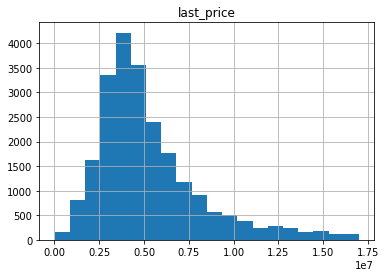

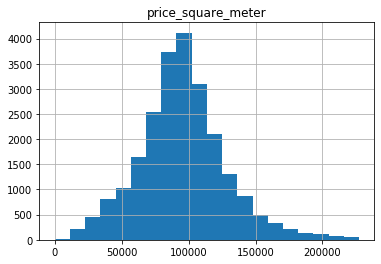

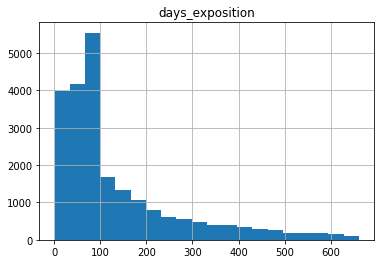

In [42]:
df_4columns = df.loc[:, ['last_price', 'price_square_meter', 'days_exposition']]
for column in df_4columns:
    
    qr = df[column].quantile(.75) - df[column].quantile(.25) #считает межквартильный размах
    
    mini = df[column].min() # считает нижний диапазон
    qmin = df[column].quantile(.25) - qr * 3
    if qmin < mini:
        qmin = mini
    else:
        qmin = qmin
    
    maxi = df[column].max() # считает верхний диапазон
    qmax = df[column].quantile(.75) + qr * 3
    if qmax > maxi:
        qmax = maxi
    else:
        qmax = qmax
        
    df_4columns.hist(column, bins = 20, range = ((qmin), (qmax))) #строит гистограммы в нужном диапазоне

Сформировал таблицу только из нужных столбцов, написал цикл для опреления диапазона в соответствии с межквартильным размахом от Q1-3\*IQR до Q3+3\*IQR и построения гистограмм.

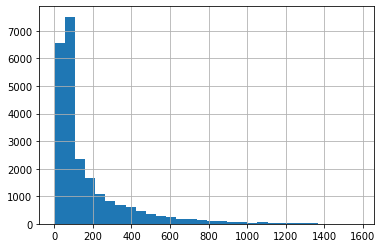

In [43]:
df['days_exposition'].hist(bins = 30)

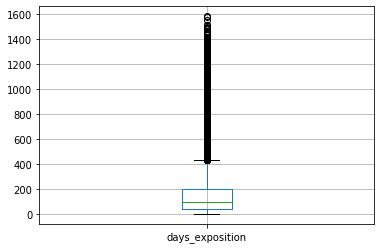

In [44]:
df.boxplot(column = 'days_exposition')

In [45]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно процесс продажи длится от 45 до 200 дней (медиана 95). (Если основные параметры продаваемой квартиры адекватны).

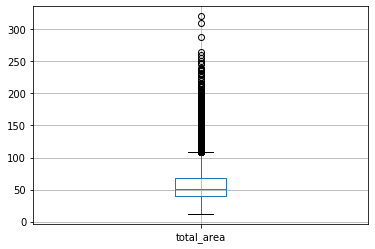

In [53]:
good_price.boxplot(column = 'total_area')

In [54]:
good_price = good_price[(good_price['total_area'] < 250) & (good_price['total_area'] > 12)]

Ограничил площадь квартир в выборке 12 кв м (минимум) и 250 кв м (исходя из boxplot) 

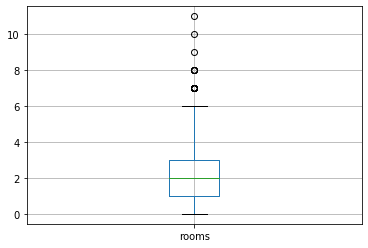

In [55]:
good_price.boxplot(column = 'rooms')

In [56]:
good_price = good_price[good_price['rooms'] <= 6]

Убрал объявления с количеством комнат больше 6 на основании диаграммы размаха.

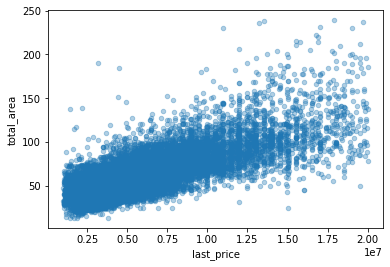

In [57]:
good_price.plot(x = 'last_price', y = 'total_area', kind = 'scatter', alpha = 0.35)

In [58]:
good_price['last_price'].corr(good_price['total_area'])

0.7749306316490966

Налицо зависимость цены квартиры от ее площади.

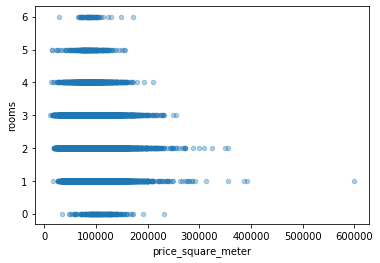

In [59]:
good_price.plot(x = 'price_square_meter', y = 'rooms', kind = 'scatter', alpha = 0.35)

In [60]:
good_price['price_square_meter'].corr(good_price['rooms'])

-0.14188690049742014

Цена квадратного метра от количества комнат не зависит.

In [61]:
df = good_price
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3,другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214


In [62]:
df.pivot_table(index = 'floor_cat', values = 'price_square_meter', aggfunc = 'mean')

,price_square_meter
floor_cat,
1,81741.656502
другой,99296.677601
последний,88370.610313


In [63]:
1 - 78300 / 96407

0.18781831194830256

In [64]:
1 - 85557 / 96407

0.11254369495990957

Средние значения цены за квадратный метр показывают, что на первых этажах цена ниже на 18%, а на последних этажах цена ниже на 11% чем в квартирах на других этажах.

In [65]:
df['cityCenters_nearest']

0        16028.0
1        18603.0
2        13933.0
4         8098.0
5            NaN
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 22695, dtype: float64

In [66]:
df['cityCenters_nearest'].isnull().count()

22695

In [67]:
good_city_center = df[df['cityCenters_nearest'].notnull()]
good_city_center.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3,другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214


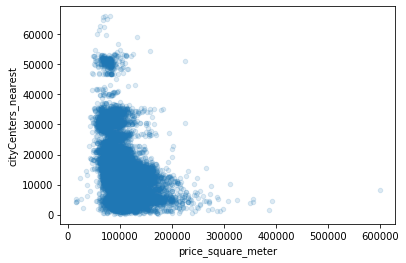

In [68]:
good_city_center.plot(x = 'price_square_meter', y = 'cityCenters_nearest', kind = 'scatter', alpha = 0.15)

На диаграмме рассеивания видна корреляция между параметрами, значит есть зависимостью между расстоянием от центра города и ценой кв метра.

In [69]:
good_city_center['price_square_meter'].corr(good_city_center['cityCenters_nearest'])

-0.38861500513902336

Значение коэффициента Пирсона не очень высокое.

Зависимость цены от удаленности от центра по данной выборке есть, но такая сильная как можно подумать.

In [70]:
df.pivot_table(index = 'day_exposition', values = 'price_square_meter')

,price_square_meter
day_exposition,
0,95328.863560
1,96038.093205
2,96395.243112
3,95451.950190
4,95589.986391
5,94790.618362
6,94852.650314


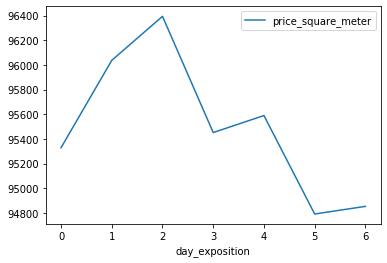

In [71]:
df.pivot_table(index = 'day_exposition', values = 'price_square_meter').plot()

Большой зависимости цены за кв метр от дня размещения нет, небольшое уменьшение в начале недели и к ее концу.

In [72]:
df.pivot_table(index = 'month_exposition', values = 'price_square_meter')

,price_square_meter
month_exposition,
1,95954.967972
2,95088.256725
3,95936.612970
4,97415.744178
5,95024.416883
6,93019.561301
7,95530.627724
8,96430.552082
9,97077.001076


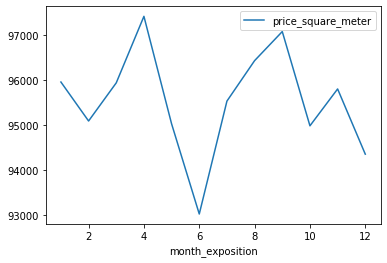

In [73]:
df.pivot_table(index = 'month_exposition', values = 'price_square_meter').plot()

Видна зависимость средней цены за кв метр от месяца размещения, цена падает в летние месяцы. Таким образом, квартиру выгоднее всего покупать в июне.

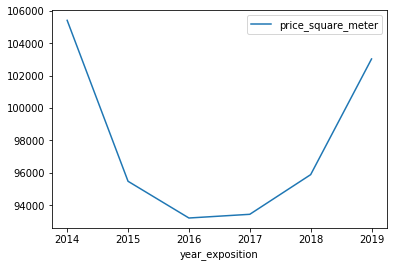

In [74]:
df.pivot_table(index = 'year_exposition', values = 'price_square_meter').plot()

In [75]:
df.pivot_table(index = 'year_exposition', values = 'price_square_meter')

,price_square_meter
year_exposition,
2014,105407.901474
2015,95478.864992
2016,93212.561057
2017,93441.252321
2018,95888.242645
2019,103025.108282


### На графике видна зависимость средней цены за кв метр от года размещения, после 2014 года цена падала, достигла минимума в 2016 году, затем начала расти, но прежних значений еще не достигла.

In [76]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3,другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214


In [77]:
df_local = df.query('locality_name != "Санкт-Петербург"')
df_local.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018,9,0,другой,95065.789474,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017,11,3,другой,99195.710456,0.284182,0.386059
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018,5,2,другой,87454.764777,0.465320,0.265682
11,9,3300000.0,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,2018,8,0,другой,75000.000000,0.704545,0.136364


In [78]:
df_local.groupby('locality_name')['last_price'].count().sort_values(ascending = False).head(10)

locality_name
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           396
Пушкин               360
Колпино              337
посёлок Парголово    326
Гатчина              306
деревня Кудрово      299
Выборг               233
Петергоф             199
Name: last_price, dtype: int64

In [79]:
df_local_pivot = df_local.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc = ['mean', 'count'])
df_local_pivot_sorted_top10 = df_local_pivot.sort_values(by = ('count', 'price_square_meter'), ascending = False).head(10)
df_local_pivot_sorted_top10

,mean,count
,price_square_meter,price_square_meter
locality_name,,
посёлок Мурино,85752.189195,522
посёлок Шушары,78677.364217,440
Всеволожск,67275.592779,396
Пушкин,101788.572053,360
Колпино,75333.295801,337
посёлок Парголово,90332.263023,326
Гатчина,68935.194838,306
деревня Кудрово,92473.547576,299


In [80]:
df_local_pivot_sorted_top10.reset_index()

,locality_name,mean,count
,,price_square_meter,price_square_meter
0,посёлок Мурино,85752.189195,522
1,посёлок Шушары,78677.364217,440
2,Всеволожск,67275.592779,396
3,Пушкин,101788.572053,360
4,Колпино,75333.295801,337
5,посёлок Парголово,90332.263023,326
6,Гатчина,68935.194838,306
7,деревня Кудрово,92473.547576,299
8,Выборг,58685.669032,233


In [81]:
df_local_pivot_sorted_top10.sort_values(by = ('mean', 'price_square_meter'), ascending = False)

,mean,count
,price_square_meter,price_square_meter
locality_name,,
Пушкин,101788.572053,360
деревня Кудрово,92473.547576,299
посёлок Парголово,90332.263023,326
посёлок Мурино,85752.189195,522
Петергоф,84290.765740,199
посёлок Шушары,78677.364217,440
Колпино,75333.295801,337
Гатчина,68935.194838,306


In [82]:
df_local_spb = df.query('locality_name == "Санкт-Петербург"')
df_local_spb['price_square_meter'].mean()

108664.88859305145

### Средняя цена за кв метр в пригородах ниже чем в Санкт-Петербурге, далее по убыванию цены идут: Пушкин, Сестрорецк, поселок Парголово, Петергоф.

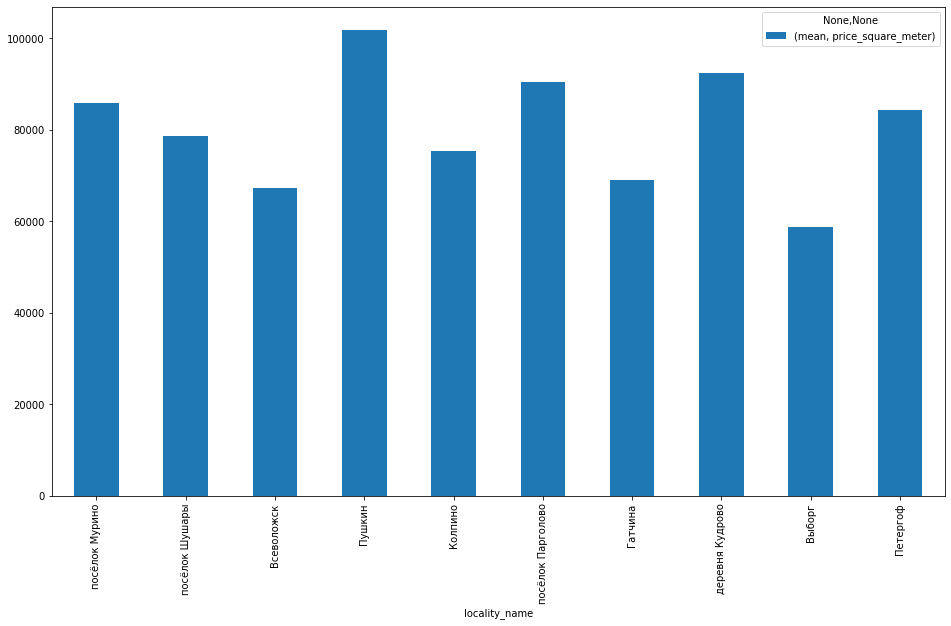

In [83]:
df_local_pivot_sorted_top10.plot(y = ('mean', 'price_square_meter') ,figsize = (16,9), legend = True, kind = 'bar')

In [84]:
df_local_spb.reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3,другой,120370.370370,0.472222,0.231481
1,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.300,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214
2,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,1,другой,100000.000000,0.320000,0.410000
3,5,7915000.0,71.60,2019-04-18,2,NaN,24,40.096,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0,2019,4,3,другой,110544.692737,0.560000,0.263966
4,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2017,2,6,другой,88524.590164,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.300,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,2018,2,2,другой,100566.572238,0.461756,0.257790
14978,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.000,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,2018,7,3,другой,105769.230769,0.596154,0.115385
14979,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,2016,10,3,другой,129903.978052,0.552812,0.145405
14980,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,2017,3,1,другой,72490.845228,0.547792,0.103356


In [85]:
df_local_spb['cityCenters_nearest'].describe()

count    14935.000000
mean     11877.093204
std       4730.526365
min        208.000000
25%       8955.000000
50%      12446.000000
75%      15037.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

In [86]:
df_spb_good = df_local_spb.dropna(subset = ['cityCenters_nearest'])

In [87]:
df_spb_good['cityCenters_nearest'].describe()

count    14935.000000
mean     11877.093204
std       4730.526365
min        208.000000
25%       8955.000000
50%      12446.000000
75%      15037.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

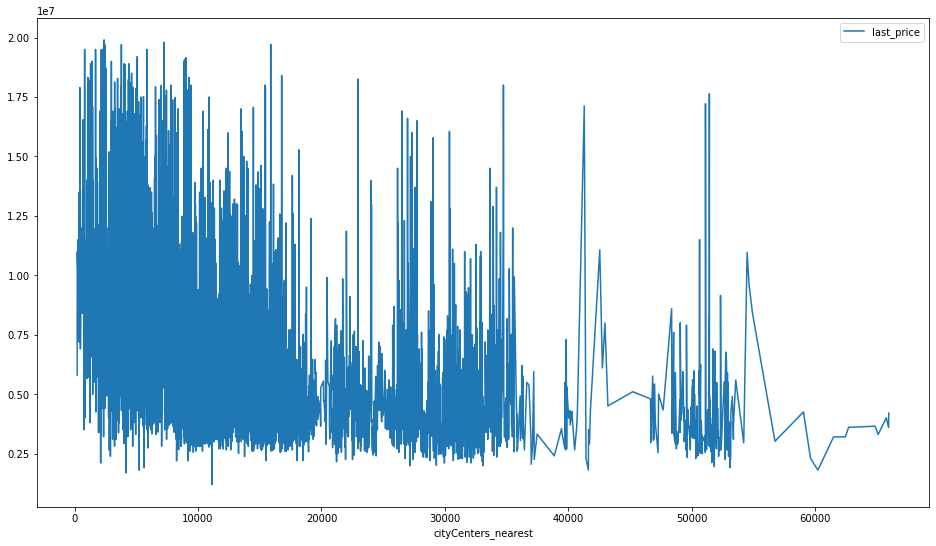

In [89]:
df.pivot_table(index = 'cityCenters_nearest', values = 'last_price').plot(figsize = (16,9))

Исходя из графика можно сделать вывод, что центр заканчивается на границе 4000 м.

In [90]:
df_spb_center = df_spb_good.query('cityCenters_nearest <= 4000')
df_spb_suburb = df_spb_good.query('cityCenters_nearest > 4000')

In [91]:
df_spb_center = df_spb_center.drop(axis = 1, labels = ['total_images', 'first_day_exposition', 'ceiling_height', 'floors_total',
                                          'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
                                      'balcony', 'locality_name', 'airports_nearest', 'parks_around3000', 'parks_nearest',
                                      'ponds_around3000', 'ponds_nearest', 'days_exposition', 'year_exposition', 'month_exposition',
                                      'day_exposition', 'floor_cat', 'rel_living_total_area', 'rel_kitchen_total'])

In [93]:
df_spb_center.head(3)

,last_price,total_area,rooms,cityCenters_nearest,price_square_meter
24,6500000.0,97.2,2,2336.0,66872.427984
35,15500000.0,149.0,5,3502.0,104026.845638
99,9600000.0,90.0,4,2818.0,106666.666667


In [94]:
len(df_spb_center)

985

In [95]:
df_spb_center.corr()

,last_price,total_area,rooms,cityCenters_nearest,price_square_meter
last_price,1.000000,0.708602,0.504828,-0.134351,0.349749
total_area,0.708602,1.000000,0.796964,-0.051181,-0.348064
rooms,0.504828,0.796964,1.000000,-0.053077,-0.365454
cityCenters_nearest,-0.134351,-0.051181,-0.053077,1.000000,-0.114990
price_square_meter,0.349749,-0.348064,-0.365454,-0.114990,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B64527E48>,
      dtype=object)

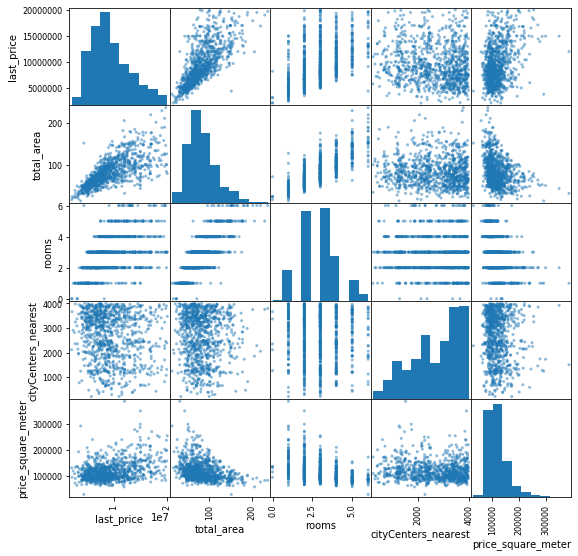

In [96]:
pd.plotting.scatter_matrix(df_spb_center, figsize=(9, 9))

In [97]:
df_spb_center.corr()

,last_price,total_area,rooms,cityCenters_nearest,price_square_meter
last_price,1.000000,0.708602,0.504828,-0.134351,0.349749
total_area,0.708602,1.000000,0.796964,-0.051181,-0.348064
rooms,0.504828,0.796964,1.000000,-0.053077,-0.365454
cityCenters_nearest,-0.134351,-0.051181,-0.053077,1.000000,-0.114990
price_square_meter,0.349749,-0.348064,-0.365454,-0.114990,1.000000


### В центре города основные факторы влияющие на цену квартиры (и кв метра) это общая площадь и количество комнат. 

### Для квартир расположенных в центре, расстояние до центра имеет меньшее влияние.

In [98]:
df_spb_suburb = df_spb_suburb.drop(axis = 1, labels = ['total_images', 'first_day_exposition', 'ceiling_height', 'floors_total',
                                          'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
                                      'balcony', 'locality_name', 'airports_nearest', 'parks_around3000', 'parks_nearest',
                                      'ponds_around3000', 'ponds_nearest', 'days_exposition', 'year_exposition', 'month_exposition',
                                      'day_exposition', 'floor_cat', 'rel_living_total_area', 'rel_kitchen_total'])

In [99]:
df_spb_suburb['cityCenters_nearest'].describe()

count    13950.000000
mean     12527.108602
std       4181.419958
min       4004.000000
25%      10076.250000
50%      12794.500000
75%      15189.750000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

In [101]:
df_spb_suburb.corr()

,last_price,total_area,rooms,cityCenters_nearest,price_square_meter
last_price,1.000000,0.826054,0.528670,-0.346837,0.515014
total_area,0.826054,1.000000,0.782263,-0.223508,-0.010466
rooms,0.528670,0.782263,1.000000,-0.164738,-0.237772
cityCenters_nearest,-0.346837,-0.223508,-0.164738,1.000000,-0.326825
price_square_meter,0.515014,-0.010466,-0.237772,-0.326825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B67C38808>,
      dtype=object)

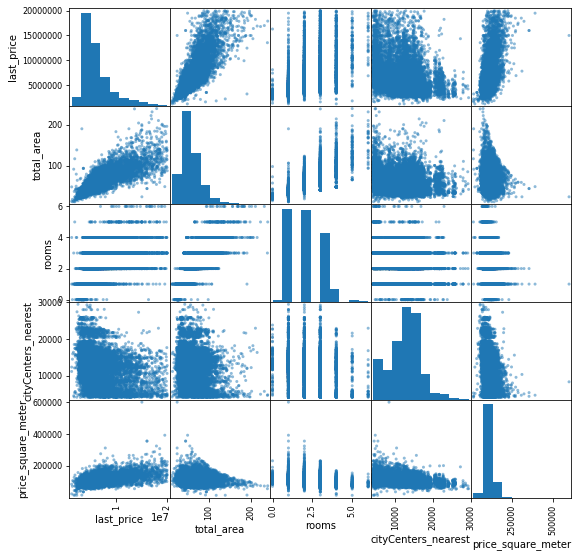

In [102]:
pd.plotting.scatter_matrix(df_spb_suburb, figsize=(9, 9))

### В пригородах в целом, ситуация похожая - на цену в основном влияют общая площадь, количество комнат. В сравнении квартирами в центре, расстояние до центра играет большую роль.

In [103]:
df_spb_center.head()

,last_price,total_area,rooms,cityCenters_nearest,price_square_meter
24,6500000.0,97.2,2,2336.0,66872.427984
35,15500000.0,149.0,5,3502.0,104026.845638
99,9600000.0,90.0,4,2818.0,106666.666667
136,6500000.0,51.8,2,3618.0,125482.625483
138,4800000.0,40.0,2,2913.0,120000.000000


In [104]:
df_spb_suburb.head()

,last_price,total_area,rooms,cityCenters_nearest,price_square_meter
0,13000000.0,108.0,3,16028.0,120370.370370
2,5196000.0,56.0,2,13933.0,92785.714286
4,10000000.0,100.0,2,8098.0,100000.000000
7,7915000.0,71.6,2,11634.0,110544.692737
9,5400000.0,61.0,3,15008.0,88524.590164


In [105]:
mean_price_center = df_spb_center['last_price'].mean()
mean_price_suburb = df_spb_suburb['last_price'].mean()

mean_pricesqm_cen = df_spb_center['price_square_meter'].mean()
mean_pricesqm_sub = df_spb_suburb['price_square_meter'].mean()

In [106]:
data_2 = {'mean_price' : [mean_price_center, mean_price_suburb],
         'mean_price_sq_meter' : [mean_pricesqm_cen, mean_pricesqm_sub]}
           
graph = pd.DataFrame(data_2,columns = ['mean_price', 'mean_price_sq_meter'], index = ['center', 'suburb'])
graph

,mean_price,mean_price_sq_meter
center,9.450872e+06,118965.672380
suburb,6.194556e+06,107885.477609


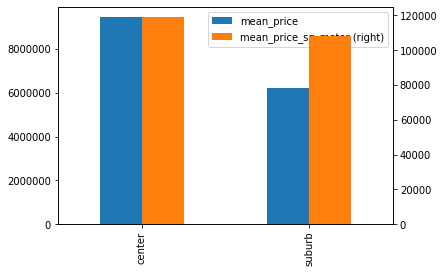

In [107]:
graph.plot(kind = 'bar', secondary_y = 'mean_price_sq_meter')

Построил сравнительный график средней цены и цены за кв метр в центре и на окраинах. Интересно, что средня цена на окраине ниже, средняя цена за кв метр отличается не сильно.

In [108]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019,3,3,другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,1,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,другой,92785.714286,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,1,другой,100000.000000,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018,9,0,другой,95065.789474,0.473684,0.299342


In [109]:
df_app = df.query('is_apartment == True')
df_app.head()
len(df_app)

42

In [110]:
df_app.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,price_square_meter,rel_living_total_area,rel_kitchen_total
total_images,1.000000,-0.100842,0.231985,0.404840,-0.376007,0.407545,0.254427,0.401545,NaN,NaN,NaN,0.079514,0.107244,-0.163535,0.024925,-0.093318,0.119738,-0.316132,0.068967,0.070878,0.096664,-0.221161,0.459256,-0.358782,0.055908,-0.237635
last_price,-0.100842,1.000000,0.419009,0.261526,0.300914,-0.224462,0.381186,0.059437,NaN,NaN,NaN,0.231946,0.261069,0.138550,0.048284,0.348112,0.235688,0.455242,-0.590954,0.012131,0.092582,0.275181,0.014390,0.585123,0.146823,-0.096854
total_area,0.231985,0.419009,1.000000,0.740506,-0.216091,-0.287646,0.905440,-0.082581,NaN,NaN,NaN,0.638147,0.064728,0.103475,0.189887,-0.022305,0.218487,-0.146287,0.121294,-0.244871,0.244433,0.124491,0.321833,-0.336263,0.162357,-0.390216
rooms,0.404840,0.261526,0.740506,1.000000,-0.092719,-0.195764,0.833236,-0.090106,NaN,NaN,NaN,0.218823,0.084756,-0.119653,-0.071342,0.125891,0.165491,-0.036171,-0.235640,-0.288076,0.239897,0.051220,0.320733,-0.286189,0.471944,-0.616884
ceiling_height,-0.376007,0.300914,-0.216091,-0.092719,1.000000,-0.103351,-0.148223,-0.031468,NaN,NaN,NaN,-0.112586,0.315160,-0.025614,-0.212859,0.132732,-0.038176,0.361871,-0.405484,-0.143200,0.024577,0.039076,-0.018679,0.804565,0.061341,0.387844
floors_total,0.407545,-0.224462,-0.287646,-0.195764,-0.103351,1.000000,-0.363382,0.838598,NaN,NaN,NaN,-0.096745,0.180908,-0.506219,-0.184298,-0.102176,0.142762,-0.275176,0.016610,0.225068,-0.296800,-0.011910,0.256328,-0.032801,-0.334159,0.251641
living_area,0.254427,0.381186,0.905440,0.833236,-0.148223,-0.363382,1.000000,-0.199344,NaN,NaN,NaN,0.412094,-0.011669,0.178677,0.134717,0.212085,0.144423,0.071163,-0.112241,-0.245066,0.266283,0.014729,0.218629,-0.281079,0.545759,-0.551545
floor,0.401545,0.059437,-0.082581,-0.090106,-0.031468,0.838598,-0.199344,1.000000,NaN,NaN,NaN,0.046327,0.233194,-0.445412,-0.127867,-0.052278,0.193272,-0.185708,0.007918,0.202792,-0.212048,-0.011631,0.403857,0.070314,-0.300170,0.188103
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Для аппартаментов важными характеристиками, которые влияют на стоимость являются: общая площадь, кол-во комнат, высота потолков, этаж, наличие балкона, близость к паркам и водоемам, а также отношение жилой площади к общей.

In [111]:
df['studio'].sum()

148

In [112]:
df['open_plan'].sum()

65

In [113]:
df_open = df.query('open_plan == True')
df_open

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,floor_cat,price_square_meter,rel_living_total_area,rel_kitchen_total
349,4,2320000.0,25.0,2017-09-27,0,NaN,14,17.000,1,False,False,True,25.0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2017,9,2,1,92800.000000,0.680000,1.0
508,0,3375000.0,34.4,2017-03-28,0,NaN,26,24.300,19,False,False,True,34.4,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,2017,3,1,другой,98110.465116,0.706395,1.0
780,9,2600000.0,26.1,2018-02-20,0,NaN,18,12.267,8,False,False,True,26.1,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018,2,1,другой,99616.858238,0.470000,1.0
839,14,1900000.0,35.0,2017-04-14,0,2.7,5,15.000,3,False,False,True,35.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2017,4,4,другой,54285.714286,0.428571,1.0
946,5,2200000.0,23.0,2016-09-27,0,NaN,27,18.000,7,False,False,True,23.0,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,2016,9,1,другой,95652.173913,0.782609,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,13,2450000.0,28.5,2017-11-22,0,NaN,12,18.000,7,False,False,True,28.5,2,Санкт-Петербург,20381.0,19383.0,0.0,NaN,1.0,579.0,73.0,2017,11,2,другой,85964.912281,0.631579,1.0
21628,9,3900000.0,34.0,2017-03-18,0,NaN,20,24.000,10,False,False,True,34.0,2,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0,2017,3,5,другой,114705.882353,0.705882,1.0
22573,8,2250000.0,24.0,2017-09-28,0,NaN,12,15.000,3,False,False,True,24.0,2,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2017,9,3,другой,93750.000000,0.625000,1.0
23442,0,2500000.0,27.7,2017-09-28,0,NaN,24,18.000,4,False,False,True,27.7,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2017,9,3,другой,90252.707581,0.649819,1.0


In [114]:
df_open.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,month_exposition,day_exposition,price_square_meter,rel_living_total_area,rel_kitchen_total
total_images,1.000000,-0.065177,-0.058908,-0.038090,-0.017563,-0.022158,-0.073897,-0.024830,NaN,NaN,NaN,0.058720,0.178515,-0.329192,0.198517,-0.121819,0.036082,0.019731,-0.080716,-0.143915,0.036605,0.180268,0.102997,0.044948,-0.053023,0.054804
last_price,-0.065177,1.000000,0.817873,0.732979,-0.066781,-0.088681,0.806199,0.030166,NaN,NaN,NaN,-0.349781,-0.192363,-0.096264,-0.305650,-0.083877,-0.199937,-0.215815,0.049087,0.150975,-0.398847,-0.163999,-0.225574,0.423373,0.048634,-0.612226
total_area,-0.058908,0.817873,1.000000,0.921722,-0.181250,-0.272629,0.903007,-0.155320,NaN,NaN,NaN,-0.396113,-0.177706,0.051534,-0.064768,-0.075041,-0.327549,-0.164156,0.040557,0.231474,-0.564683,-0.268164,-0.226993,-0.140754,-0.110861,-0.799138
rooms,-0.038090,0.732979,0.921722,1.000000,-0.173222,-0.333518,0.852570,-0.204120,NaN,NaN,NaN,-0.688117,-0.195986,-0.022374,-0.054374,0.067944,-0.528686,-0.054955,-0.061150,0.235526,-0.664750,-0.237147,-0.184432,-0.107947,-0.042231,-0.902844
ceiling_height,-0.017563,-0.066781,-0.181250,-0.173222,1.000000,0.314952,-0.132795,0.312785,NaN,NaN,NaN,0.117259,0.238439,-0.245052,-0.791021,0.128338,-1.000000,-0.135582,-0.567389,-0.164510,0.143159,0.166359,-0.033963,0.222034,0.126669,0.201028
floors_total,-0.022158,-0.088681,-0.272629,-0.333518,0.314952,1.000000,-0.224834,0.574941,NaN,NaN,NaN,0.232212,0.269870,0.049569,0.284362,-0.422739,0.711046,0.004331,-0.023751,0.143377,0.138764,-0.007469,-0.025922,0.256074,0.106262,0.243831
living_area,-0.073897,0.806199,0.903007,0.852570,-0.132795,-0.224834,1.000000,-0.153103,NaN,NaN,NaN,-0.358892,-0.243106,0.029702,-0.148069,-0.046572,-0.376620,-0.132337,-0.053541,0.168662,-0.497877,-0.125566,-0.126698,-0.007010,0.312678,-0.668845
floor,-0.024830,0.030166,-0.155320,-0.204120,0.312785,0.574941,-0.153103,1.000000,NaN,NaN,NaN,0.158541,0.134555,-0.174850,0.176229,-0.374077,0.513815,-0.052116,-0.243207,0.150163,0.038760,0.096974,0.031729,0.298923,0.014189,0.164701
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Для квартир с открытой планировкой важными характеристиками, влияющими на цену, являются: наличие изображений в объявлении, общая площадь, кол-во комнат, высота потолков, количество этажей в доме, жилая площадь, этаж, наличие балкона, близость к прудам и водоемам.

### Но в целом, выборка слишком мала, чтобы делать однозначные выводы.

## 2. Общие выводы

Обычно процесс продажи длится от 45 до 200 дней (медиана 95), если основные параметры продаваемой квартиры адекватны.

Основной фактор, влияющий на цену квартиры - это ее площадь.

На первых этажах цена за кв метр ниже на 18%, на последних этажах цена ниже на 11% чем в квартирах на других этажах. Как в песне Цоя - "первый, последний не предлагать".

Большой зависимости цены за кв метр от дня размещения нет, небольшое уменьшение в начале недели и к ее концу.

Цены на квартиры падают в летние месяцы, выгоднее всего квартиру покупать в июне.

После 2014 года цены на квартиры падали (оно и понятно), достигли минимума в 2016 году, а затем снова начали расти, но прежних "докризисных" значений еще не достигли.

Средняя цена за кв метр в пригородах ниже чем в Санкт-Петербурге, далее по убыванию цены идут: Пушкин, Сестрорецк, поселок Парголово, Петергоф.

Аппартаментов, студий и квартир с открытой планировкой еще продается достаточно мало, однако тут возрастает количество факторов, влияющих на цену: близость к паркам и водоемам, выстота потолков, балконы, этажность дома.